# Ανάλυση αρχείων ήχου με το Praat


## Βήμα 1

In [1]:
# !pip install librosa 

import librosa.core
import librosa.display

import numpy as np 
import matplotlib.pyplot as plt 

## Bήμα 2: 
Φτιάξτε μία συνάρτηση (data parser) που να διαβάζει όλα τα αρχεία ήχου που δίνονται μέσα στο φάκελο digits/
και να επιστρέφει 3 λίστες Python, που να περιέχουν: Το wav που διαβάστηκε με librosa, τον αντίστοιχο
ομιλητή και το ψηφίο.

In [2]:
#Proxeiro 
filename = 'D:/Αναγνώριση Προτύπων/LABS/02_ΑναγνώρισηΦωνής/pr_lab2_2020-21_data/digits/'

files = librosa.util.find_files(filename) 
files = np.array(files)

y, sr = librosa.load(librosa.ex('nutcracker'))

In [3]:
def data_parser(files):
  
  wav = []
  digit = []
  speaker = []
  for file in files:
    if("one" in file):
      digit.append("one")
    elif ("two" in file):
      digit.append("two")
    elif ("three" in file):
      digit.append("three")
    elif ("four" in file):
      digit.append("four")
    elif ("five" in file):
      digit.append("five")
    elif ("six" in file):
      digit.append("six")
    elif ("seven" in file):
      digit.append("seven")
    elif ("eight" in file):
      digit.append("eight")
    elif ("nine" in file):
      digit.append("nine")
     
    for i in range(15,0,-1): # Reverse Counting to avoid merge 1with11 etc.
      if str(i) in file:
        speaker.append(i)
        break;

    temp_y, sr = librosa.load(file)
    wav.append((temp_y,sr))
   

  return np.array(wav), np.array(speaker), np.array(digit)
  
  
  

In [4]:
filename = 'D:/Αναγνώριση Προτύπων/LABS/B_ΑναγνώρισηΦωνής/pr_lab2_2020-21_data/digits/'

files = librosa.util.find_files(filename) 
files = np.array(files)

wav, speaker, digit = data_parser(files)

In [5]:
speaker.shape



(133,)

## Bήμα 3: 
Εξάγετε με το librosa τα Mel-Frequency Cepstral Coefficients (MFCCs) για κάθε αρχείο ήχου. Εξάγετε 13
χαρακτηριστικά ανά αρχείο. Χρησιμοποιήστε μήκος παραθύρου 25 ms και βήμα 10 ms. Επίσης, υπολογίστε και
την πρώτη και δεύτερη τοπική παράγωγο των χαρακτηριστικών, τις λεγόμενες deltas και delta-deltas (hint:
υπάρχει έτοιμη υλοποίηση στο librosa).

In [6]:
mfcc=[]
mfcc_delta=[]
mfcc_delta2=[]

for i in range(len(wav)):
    y= wav[i,0]
    sr = wav[i,1]
    window = int(0.025*sr)
    hop_length = int(0.01*sr)
    frame = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft= window, hop_length= hop_length).T
    mfcc.append((frame))
    mfcc_delta.append(librosa.feature.delta(frame))
    mfcc_delta2.append(librosa.feature.delta(frame, order=2))

In [7]:
zcr=[]
for i in range(len(wav)):
    y= wav[i,0]
    zcr.append(librosa.feature.zero_crossing_rate(y, hop_length=int(0.01 * 22050)))  
    

In [81]:
wav[0,1]

22050

In [9]:
from sklearn.preprocessing import StandardScaler
# Standardize data
scaler = StandardScaler()
scaler.fit(np.concatenate(mfcc)) # Create a joint array
for i in range(len(mfcc)):
    mfcc[i] = scaler.transform(mfcc[i])


In [ ]:
mfcc[0].shape

## Bήμα 4:
Αναπαραστήστε τα ιστογράμματα του 1ου και του 2ου MFCC των ψηφιων n1 και n2 για όλες τους τις εκφωνήσεις. Πόση απόκλιση υπάρχει?

Εξάξεται για 2 εκφωνήσεις των n1 και n2 από 2 διαφορετικούς ομιλητές τα Mel Filterback Spectral Coefficients (MFSCs), δηλαδή τα
χαρακτηριστικά που εξάγονται αφού εφαρμοστεί η συστοιχία φίλτρων της κλίμακας Mel πάνω στο φάσμα του σήματος φωνής αλλά χωρίς να 
εφαρμοστεί στο τέλος ο μετασχηματισμός DCT(εξάγεται και πάλι χαρακτηριστικά διάστασης 13). 

Αναπαραστήστε γραφικά τη συσχέτιση των MFSCs για την κάθε εκφώνηση. 

Σε ξεχωριστά διαγράμματα πραγματοποιήστε το ίδιο για τα MFCCs.Τί παρατηρείτε? Γιατί χρησιμοποιούμε τα MFCCs αντί των ΜFSCs? 

In [12]:
#AM=
n1 = 3 
n2 = 7

#Keep all the mfcc for each digit (15 occurences of n1 & n2)
mfcc_n1 = [ mfcc[i] for i,d in enumerate(digit) if d == 'three'] # [15 DifSamples, :mfcc, 13 DifFeatures]
mfcc_n2 = [ mfcc[i] for i,d in enumerate(digit) if d == 'seven'] # [15 DifSamples, :mfcc, 13 DifFeatures]



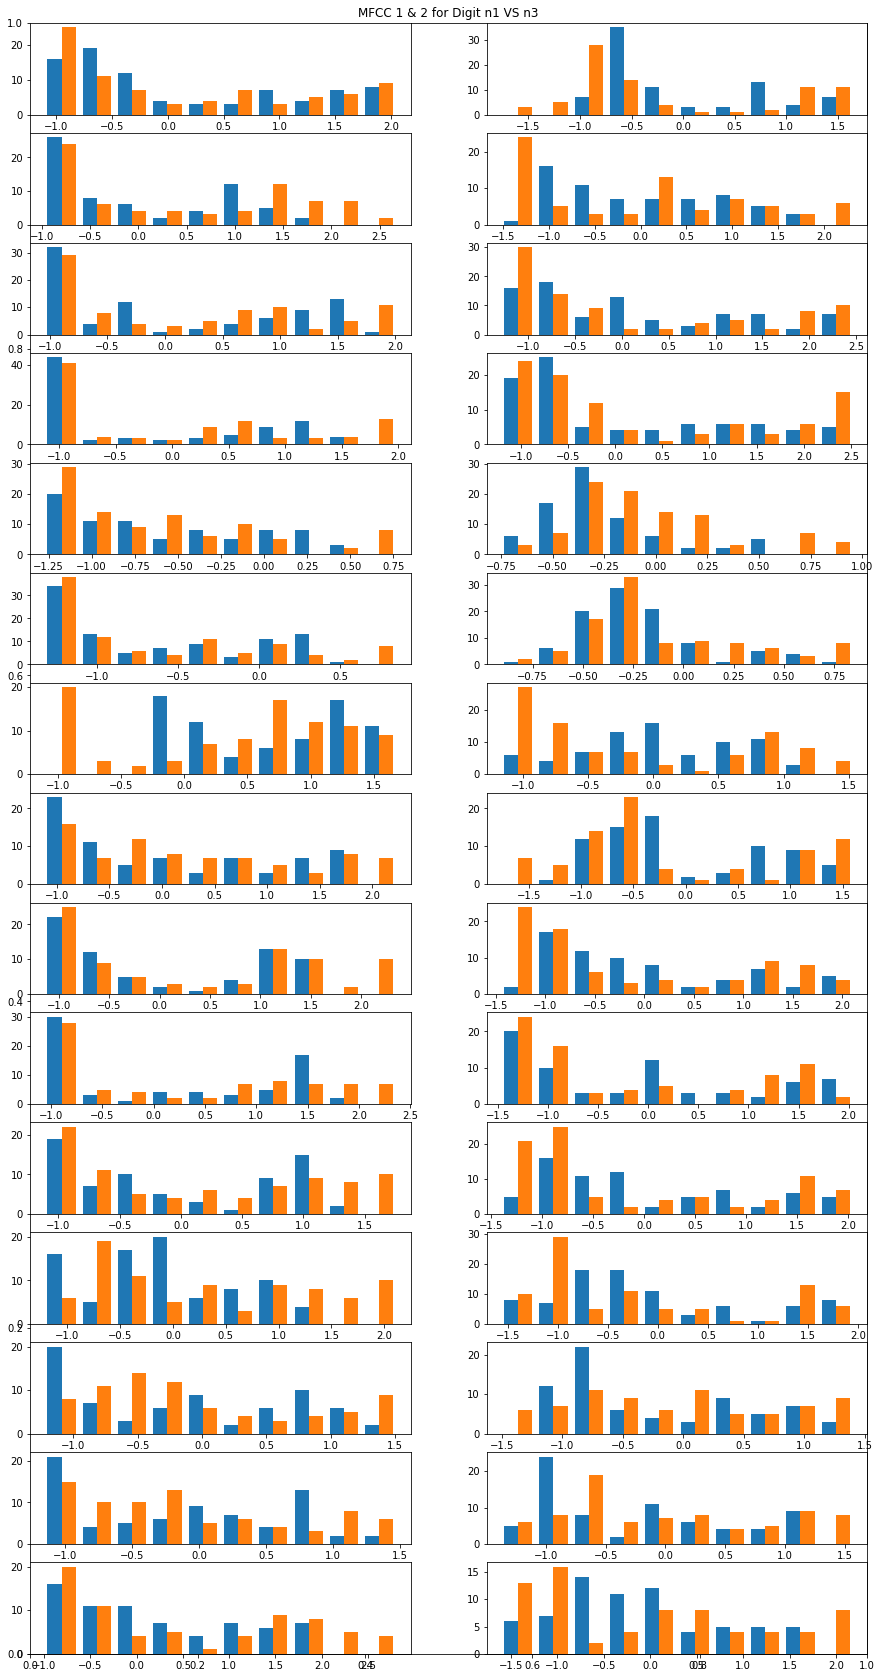

In [13]:
fig = plt.figure(figsize = (15, 30))
plt.title('MFCC 1 & 2 for Digit n1 VS n3')

j=0
for i in range(0, len(mfcc_n1)):
  fig.add_subplot(len(mfcc_n1),2,j+1)
  x_multi = [mfcc_n1[i][:,0], mfcc_n2[i][:,0]]
  plt.hist(x_multi)  # Feature 1 for both digits (3 & 7)
  #plt.hist(mfcc_n1[i][0,:])
  #plt.hist(mfcc_n2[i][0,:],color = "skyblue")
      
  fig.add_subplot(15, 2, j+2)
  x_multi = [mfcc_n1[i][:,1], mfcc_n2[i][:,1]]
  plt.hist(x_multi) # Feature 2 for both digits (3 & 7)
  #plt.hist(mfcc_n1[i][1,:])
  #plt.hist(mfcc_n2[i][1,:],color = "skyblue")
  
  j+=2




In [ ]:
# All Different Speakers for digit 3 for characteristic-feature '0'
for i in range(len(mfcc_n1)):
    plt.plot(mfcc_n1[i][:,0]);
    print(i)
plt.show()

# All Different Speakers for digit 7
for i in range(len(mfcc_n2)):
    plt.plot(mfcc_n2[i][:,0]);
    print(i)
plt.show()

In [14]:
# We apply the inverse DCT to obtain the Mel Filterbank Spectral Coefficients
from scipy.fftpack import idct

mfsc_n1 = list(map(idct, [mfcc_n1[0],mfcc_n1[1]])) # For Speaker 0 and 1 - Εκφωνησεις του n1 απο 2 Ομιλητες 
mfsc_n2 = list(map(idct, [mfcc_n2[0],mfcc_n2[1]]))

In [ ]:
mfsc_n1[0].shape  # different for mfsc_n1, mfsc_n2 (83,13) - (80,13)
#mfsc_n2[1].shape  # same for mfsc_n1, mfsc_n2 (65,13)

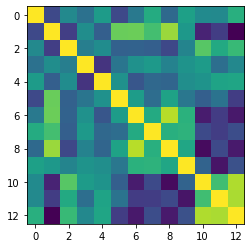

In [16]:
# Proxeiro 
import pandas as pd
data = pd.DataFrame(mfsc_n1[0])
plt.imshow(data.corr())

In [20]:
def correlation(data1, data2):
    import pandas as pd 
    from matplotlib import cm as cm

    fig = plt.figure()
    ttl=fig.suptitle('Correlation Matrices', fontsize=16)
    ttl.set_position([.5, 1.05])
    cmap = cm.get_cmap('gray', 30)
    
    j=0

    for i in range(0, len(data1)):
      #plt.figure(figsize=(8,8))
      fig.add_subplot(len(data1),2,j+1)
      im= plt.imshow(pd.DataFrame(data1[i]).corr(),  cmap=cmap)
      plt.title('mfsc')
      plt.ylabel('Speaker {}'.format(i+1))

     
      fig.add_subplot(len(data1),2,j+2)
      #plt.figure(figsize=(13,13))
      plt.imshow(pd.DataFrame(data2[i]).corr(),  cmap=cmap)
      plt.title('mfcc')
      
      plt.colorbar(im)
      fig.tight_layout()
      j+=2



In [ ]:
mfcc_n1[1].shape

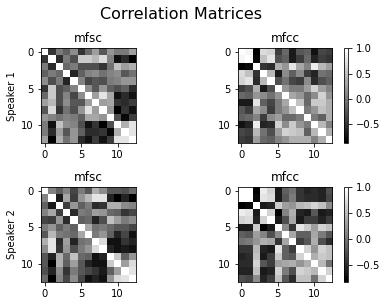

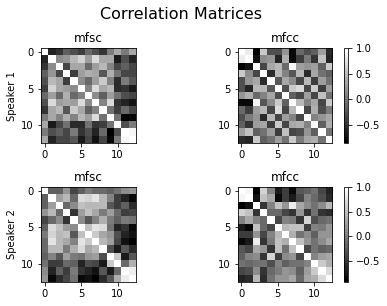

In [21]:

correlation(mfsc_n1,mfcc_n1)

correlation(mfsc_n2,mfcc_n2)


## Bήμα 5:
Μια πρώτη προσέγγιση για την αναγνώριση των ψηφίων είναι η εξαγωγή ενός μοναδικού διανύσματος χαρακτηριστικών για κάθε εκφώνηση.

Ενώστε τα mfccs – deltas – delta-deltas και έπειτα για κάθε εκφώνηση δημιουργείστε ένα διάνυσμα παίρνοντας τη μέση τιμή και 
την τυπική απόκλιση κάθε χαρακτηριστικού για όλα τα παράθυρα της εκφώνησης.

Αναπαραστήστε με scatter plot τις 2 πρώτες διαστάσεις των διανυσμάτων αυτών, χρησιμοποιώντας διαφορετικό
χρώμα και σύμβολο για κάθε ψηφίο. Σχολιάστε το διάγραμμα.

In [22]:
c = list(zip(mfcc,mfcc_delta,mfcc_delta2)) #133,3 All mfccS for All Data     [133,3,:,13]


features_0 = list(map(lambda c : np.concatenate(c, axis = 1)  , c ))   # [133][:,13*3]
means_features = list(map( lambda x: np.mean(x,axis=0), features_0) )  # [133][39]
std_features = list(map( lambda x: np.std(x,axis=0), features_0) )     # [133][39]

features = np.array(list(map(lambda x, y : np.concatenate((x,y)), means_features, std_features  ))) #[133.78] 
#133=samples. 78= 39 means(13mfcc, 13mfcc_delta, 13mfcc_delta2) &39 stds(13mfcc, 13mfcc_delta, 13mfcc_delta2)


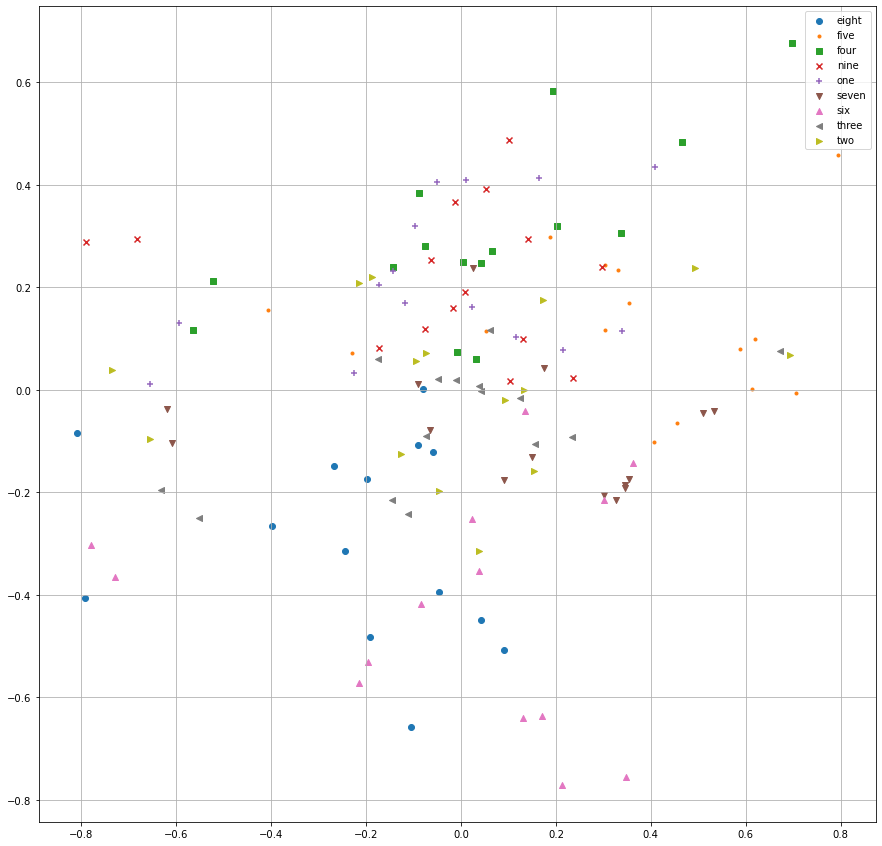

In [23]:
x = features[:,0] # Συνολο 78 χαρακτηριστικα για καθε sample 
y = features[:,1]

# colors = cm.rainbow(np.linspace(0, 1, len(ys)))

markers = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>']

fig = plt.figure(figsize = (15,15))
plt.grid(True)
for i, c in enumerate(np.unique(digit)):
  plt.scatter(x[digit == c],y[digit == c], marker=markers[i], label = c)

plt.legend()


## Bήμα 6:
Μια καλή τακτική για απεικόνιση πολυδιάστατων διανυσμάτων είναι η μείωση των διαστάσεών τους μεPrincipal Component Analysis (PCA). 

Μειώστε σε 2 τις διαστάσεις των διανυσμάτων του προηγούμενου βήματος με PCA και δημιουργείστε εκ νέου το scatter plot. 

Σχολιάστε και επαναλάβετε τη διαδικασία για 3 διαστάσεις και τρισδιάστατο scatter plot.

Τι ποσοστό της αρχικής διασποράς διατηρούν οι συνιστώσεις που προέκυψαν? Τι πληροφορία δίνουν αυτά τα
νούμερα για τα principal components? Είναι επιτυχημένη η μείωση διαστάσεων?

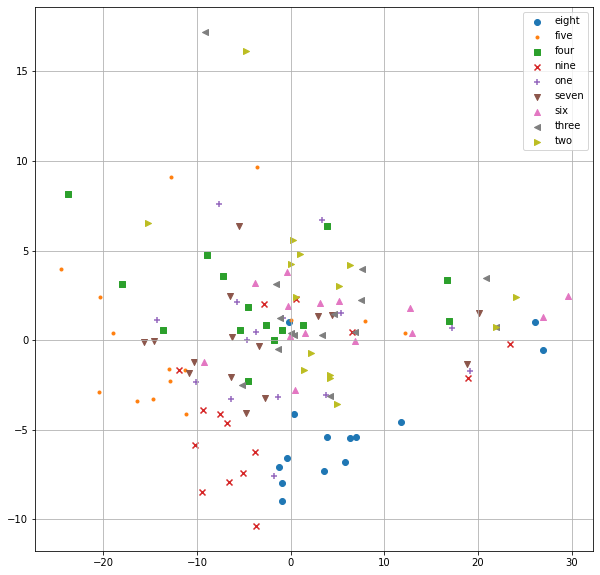

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(features)
features_2 = pca.transform(features)
x = features_2[:,0]
y = features_2[:,1]
fig = plt.figure(figsize = (10,10))
plt.grid(True)
for i, c in enumerate(np.unique(digit)):
  plt.scatter(x[digit == c],y[digit == c], marker=markers[i], label = c)
plt.legend()

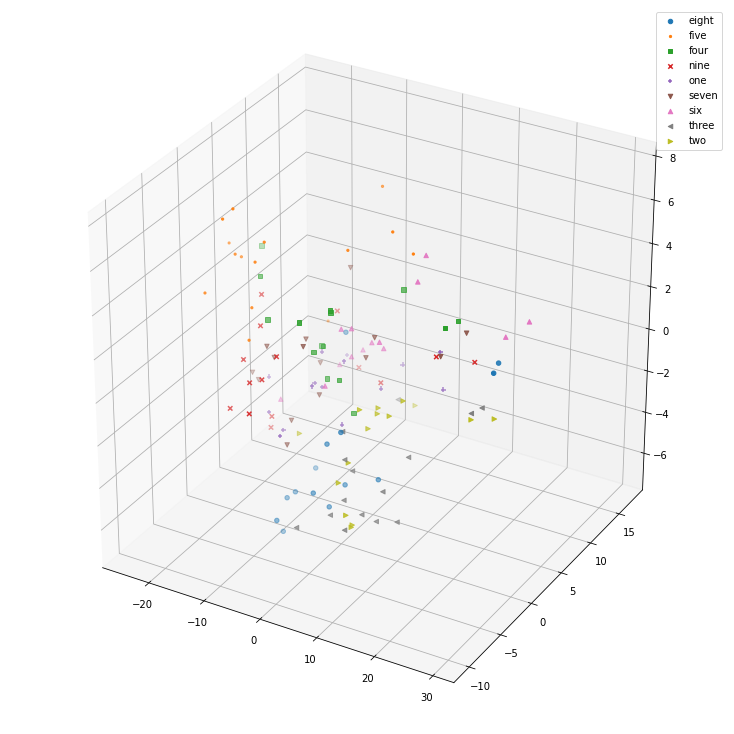

In [25]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3).fit(features)
features_3 = pca.transform(features)

x = features_3[:,0]
y = features_3[:,1]
z = features_3[:,2]

fig = plt.figure(figsize= (10,10))
ax = Axes3D(fig)

for i, c in enumerate(np.unique(digit)):
  ax.scatter(x[digit == c],y[digit == c],z[digit == c], marker=markers[i],label = c)
ax.legend()

## Bήμα 7:
Χωρίστε τα δεδομένα σε train-test με αναλογία 70%-30%. Ταξινομήστε με χρήση του Bayesian ταξινομητή της
πρώτης εργαστηριακής άσκησης, καθώς και του Naive Bayes του scikit-learn. 
Χρησιμοποιήστε επίσης, άλλους 3 ταξινομητές της επιλογής σας. Αναφέρετε το ποσοστό επιτυχίας στο test set και συγκρίνετε 
τα αποτελέσματα.

Σημείωση: Τα δεδομένα πριν την ταξινόμηση πρέπει να κανονικοποιηθούν.
(Bonus: Θα αυξηθεί το ποσοστό επιτυχίας αν προσθέσω επιπλέον ηχητικά χαρακτηριστικά στο διάνυσμά μου,
όπως π.χ. zero-crossing rate? Χρησιμοποιήστε ελεύθερα τέτοια επιπλέον χαρακτηριστικά και εάν αυξηθεί το
ποσοστό επιτυχίας αναφέρετε τη σχετική αύξηση, διαφορετικά αναφέρετε τους λόγους που απέτυχε η
προσπάθειά σας)

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

print(digit)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(digit)
print(integer_encoded)


['eight' 'eight' 'eight' 'eight' 'eight' 'eight' 'eight' 'eight' 'eight'
 'eight' 'eight' 'eight' 'eight' 'eight' 'five' 'five' 'five' 'five'
 'five' 'five' 'five' 'five' 'five' 'five' 'five' 'five' 'five' 'five'
 'five' 'four' 'four' 'four' 'four' 'four' 'four' 'four' 'four' 'four'
 'four' 'four' 'four' 'four' 'four' 'four' 'nine' 'nine' 'nine' 'nine'
 'nine' 'nine' 'nine' 'nine' 'nine' 'nine' 'nine' 'nine' 'nine' 'nine'
 'nine' 'one' 'one' 'one' 'one' 'one' 'one' 'one' 'one' 'one' 'one' 'one'
 'one' 'one' 'one' 'one' 'seven' 'seven' 'seven' 'seven' 'seven' 'seven'
 'seven' 'seven' 'seven' 'seven' 'seven' 'seven' 'seven' 'seven' 'seven'
 'six' 'six' 'six' 'six' 'six' 'six' 'six' 'six' 'six' 'six' 'six' 'six'
 'six' 'six' 'three' 'three' 'three' 'three' 'three' 'three' 'three'
 'three' 'three' 'three' 'three' 'three' 'three' 'three' 'three' 'two'
 'two' 'two' 'two' 'two' 'two' 'two' 'two' 'two' 'two' 'two' 'two' 'two'
 'two' 'two']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( features ,integer_encoded , test_size=0.3)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
#PROXEIRO 
mean = (np.mean(X_train[np.where(Y_train==1),:], axis=1))
var = np.var(X_train[np.where(Y_train==1),:], axis=1)


np.array(np.mean(X_train[np.where(Y_train==1),:], axis=1).shape)
np.array(np.mean(X_train[np.where(Y_train==1),:], axis=1).shape)
X_train[np.where(Y_train==1),:].shape
np.exp(-np.sum((np.power(X_train[0]-mean,2)/(2*var))))

0.0

In [84]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MyBayesian(BaseEstimator, ClassifierMixin):  
    """Classify samples based on the distance from the mean feature value"""

    def __init__(self,):
        self.X_mean_ = []
        self.X_var_ = []
        self.a_priory = []

    def fit(self, X, y):

        self.number_of_labels_ = len(set(y))
        
        for i in range (0,self.number_of_labels_):
            self.X_mean_.append(np.mean(X[np.where(y==i+1),:],axis=1)) #Για το καθε νουμερο το μεαν του καθε sample
            self.X_var_.append(np.var(X[np.where(y==i+1),:],axis=1))
#         self.X_mean_ = np.array(self.X_mean_)

        a_priory = []

        for i in range(0,9):
            self.a_priory.append(len(X_train[np.where(Y_train==i+1)]) / len(X_train))
#         a_priory = np.array(a_priory)
        
        return self

    def calculateProbability(self, x, mean, var):
      var = var + 10**-100
      exponent = np.exp(-np.sum((np.power(x-mean,2)/(2*var))))  
      return (1 / (np.sqrt(2*np.pi) * var)) * exponent
    
    def predict(self, X):

      proba = np.zeros((len(X),9))
      predictions = []
      for j in range(0, len(X)):
          for i in range(0,9):
              p = self.calculateProbability(X[j], self.X_mean_[i], self.X_var_[i])
              proba[j][i] =  self.a_priory[i] * p
          predictions.append(np.argmax(proba[j]))
          
      return np.array(predictions)

    
    def score(self, X, y):

        return accuracy_score(y, X)
      

In [85]:
# Import the slearn utility to compare algorithms
from sklearn import model_selection

# Import all the algorithms we want to test
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Prepare an array with all the algorithms
models = []
# models.append(('EC', EuclideanClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))

In [87]:
# Prepare the configuration to run the test
seed = 7
results = []
names = []
X = X_train
Y = Y_train

from sklearn.metrics import accuracy_score

# Every algorithm is tested and results are
# collected and printed
for name, model in models:
    model.fit(X_train,Y_train)
    cv_results = accuracy_score(Y_train,model.predict(X_train))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results.mean())
    print(msg)

NB: 0.870968 
SVC: 0.139785 
RFC: 1.000000 
KNN: 0.795699 


In [88]:
##BONUS_Step 7 
# Create a new Vector with the features including the ZeroCrossingRate

zcr=[]
for i in range(len(wav)):
    y= wav[i,0]
    zcr.append(librosa.feature.zero_crossing_rate(y, hop_length=int(0.01 * 22050)).T)  

features2=[]
for i in range(len(mfcc)):
    allwithZCR= np.concatenate([mfcc[i],zcr[i],mfcc_delta[i],mfcc_delta2[i]], axis=1)
    vecZCR = np.concatenate((allwithZCR.mean(axis=0),allwithZCR.std(axis=0)))
    features2.append(vecZCR)
    
features2 = np.array(features2) 

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( features2 ,integer_encoded , test_size=0.3)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
# Prepare the configuration to run the test
seed = 7
results = []
names = []
X = X_train
Y = Y_train

from sklearn.metrics import accuracy_score

# Every algorithm is tested and results are
# collected and printed
for name, model in models:
    model.fit(X_train,Y_train)
    cv_results = accuracy_score(Y_train,model.predict(X_train))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results.mean())
    print(msg)

ValueError: too many values to unpack (expected 2)

In [ ]:
#Proxeiro
print(mfcc[0].shape, zcr[0].shape, mfcc_delta[0].shape, mfcc_delta2[0].shape)
print(allwithZCR.shape)

## Βήμα 8:
Εξοικείωση με το PyTorch:

Δημιουργείστε ακολουθίες 10 σημείων ενός ημιτόνου και ενός συνημιτόνου με συχνότητα f = 40 Hz . 

Σκοπός είναι η πρόβλεψη του συνημιτόνου με δεδομένη την ακολουθία του ημιτόνου. Επιλέξτε σταθερή και μικρή απόσταση ανάμεσα στα διαδοχικά σημεία.

Εκπαιδεύστε ένα Αναδρομικό Νευρωνικό Δίκτυο (Recurrent Neural Network – RNN), το οποίο θα δέχεται ως είσοδο τις ακολουθίες του ημιτόνου και θα πρέπει να προβλέπει τις αντίστοιχες ακολουθίες συνημιτόνου. 

Αντί για χρήση του απλού RNN μπορούν να χρησιμοποιηθούν και οι μονάδες LSTM και GRU (δώστε το λόγο που τις χρησιμοποιήσατε και γιατί είναι τόσο διαδεδομένες).

In [100]:
import torch
import math


dtype = torch.float
device = torch.device("cpu")

length = 10
f=40
sin_vals=[]
cos_vals=[]
point_x = []

# Generate 400 sequences for Sin & Cos with length=10 and f=40
for dist in range(400):
    x = np.linspace(-dist*np.pi, dist*np.pi, length)
    sin_val = np.sin(2*np.pi*f*x)
    cos_val = np.cos(2*np.pi*f*x)
    # sin(2πfx) - cos(2πfx)
    sin_vals.append(torch.from_numpy(sin_val[np.newaxis,:,np.newaxis]))
    cos_vals.append(torch.from_numpy(cos_val[np.newaxis,:,np.newaxis])) #Bring data in the needed in
    point_x.append(x)
    

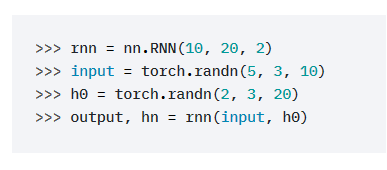

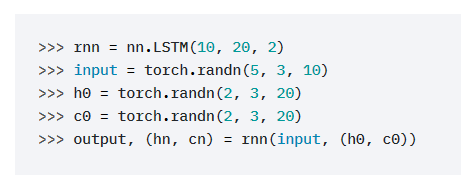


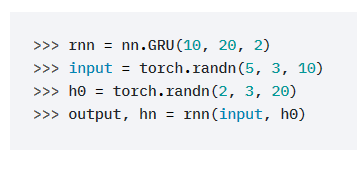

In [108]:

import torch.nn as nn

class Model (nn.Module):
    
    
    
    def __init__(self, net):
        hidden_size  = 40
        input_size = 1 
        
        super(Model, self).__init__()
        self.net = net
        
        if net=='rnn':
            self.network= nn.RNN(input_size= input_size, hidden_size = hidden_size, num_layers=2, batch_first=True)  
        
        elif net=='lstm':
            self.network = nn.LSTM(input_size= input_size, hidden_size = hidden_size, num_layers=2, batch_first=True) 
        
        elif net=='gru':
            self.network = nn.GRU(input_size= input_size, hidden_size = hidden_size, num_layers=2, batch_first=True) 
        
        self.out = nn.Linear(hidden_size,1)
        
    def forward(self, x, hs):
        outP,new_hs = self.network(x,hs)
        out_preds=[]
        for timeSteps in range(outP.size(1)):
            last_layer = self.out(outP[:, timeSteps,:])
            out_preds.append(last_layer)
        return torch.stack(out_preds, dim=1),new_hs
            
            

In [111]:
import torch
import numpy as np 
from torch.autograd import Variable
from torch import optim

dtype = torch.float
device = torch.device("cpu")

length = 10
f=40
sin_vals=[]
cos_vals=[]
point = []

# Generate 400 sequences for Sin & Cos with length=10 and f=40
for step in range(400):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    steps = np.linspace(start, end, length, dtype=np.float32)
    x_np = np.sin(steps*f*2*np.pi)    # float32 for converting torch FloatTensor
    y_np = np.cos(steps*f*2*np.pi)
    point.append(steps)
 
         # Data is converted to Tensor
    x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))    # shape (batch, time_step, input_size)
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))
    sin_vals.append(x)
    cos_vals.append(y)

rnn


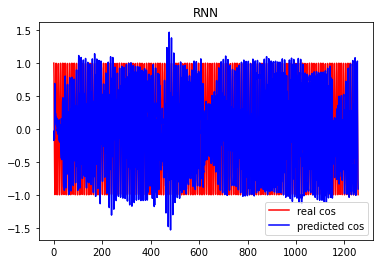

gru


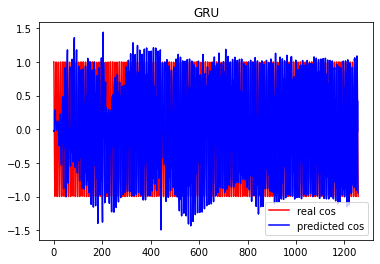

lstm


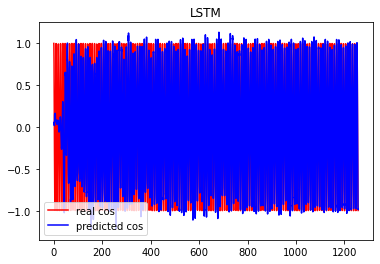

In [127]:
models = ['rnn', 'gru', 'lstm']
pred_per_algorithm={}
for i in models:
    net = Model(i)
    learning_rate = 0.01
    optim = torch.optim.Adam(net.parameters(), lr = learning_rate)
    loss_function = nn.MSELoss()
    batches = zip(sin_vals,cos_vals)
    hidden_state = None
    c = None
    all_predictions = []
    true=[]
    k=0;
   
    if(i != 'lstm'):
        print(i)
        for  sin,cos in batches:
            cos_pred,hidden_state = net(sin,hidden)
            hidden_state = hidden_state.data
            loss = loss_function(cos_pred, cos)
            optim.zero_grad()
            loss.backward()
            optim.step()
            all_predictions.append(cos_pred.data.numpy().flatten())
            true.append(cos.data.numpy().flatten())
        #pred_per_algorithm[i] = all_predictions
    else:
        
        print(i)
        for  sin,cos in batches:
            if c is None and hidden_state is None:
                cos_pred,hidden_state_c = net(sin,None)
            else:
                cos_pred,hidden_state_c = net(sin,(hidden,c))
            
            c = hidden_state_c[1].data
            hidden_state = hidden_state_c[0].data
            loss = loss_function(cos_pred, cos)
            optim.zero_grad()
            loss.backward()
            optim.step()
            all_predictions.append(cos_pred.data.numpy().flatten())
            true.append(cos.data.numpy().flatten())
        #pred_per_algorithm[i] = all_predictions
        
    plt.title(i.upper())
    plt.plot(np.array(point).flatten(), np.array(true).flatten(), 'r-',label="real cos")
    plt.plot(np.array(point).flatten(),np.array(all_predictions).flatten(), 'b-',label="predicted cos")
    plt.legend()
    plt.show()

    

    

In [ ]:
#SOLUTION 2 

#Read each module
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
 
   # Random number seed
torch.manual_seed(1)   
 
 # Parameters
TIME_STEP = 10 # Each batch contains the length of the time series, that is, the amount of data contained
INPUT_SIZE = 1 # The characteristic length of each data
LR = 0.02 # learning rate 
HIDD_NUM = 32 # The number of hidden features
 
class Model (nn.Module):
    def __init__(self, net):
        super(Model, self).__init__()
        self.net = net

        
        if net=='rnn':
                self.network= nn.RNN(input_size=INPUT_SIZE,
                hidden_size=HIDD_NUM,     # rnn hidden unit
                             num_layers=1, # RNN layers
                             batch_first=True, # Put the number of batches first. (batch, time_step, input_size)
            )

        elif net=='lstm':
                self.network = nn.LSTM(input_size=INPUT_SIZE,
                hidden_size=HIDD_NUM,     # rnn hidden unit
                             num_layers=1, # LSTM layers
                             batch_first=True, # Put the number of batches first. (batch, time_step, input_size)
            )

        elif net=='gru':
                self.network = nn.GRU(input_size=INPUT_SIZE,
                hidden_size=HIDD_NUM,     # rnn hidden unit
                             num_layers=1, # GRU layers
                             batch_first=True, # Put the number of batches first. (batch, time_step, input_size)
            )

        self.out = nn.Linear(HIDD_NUM,1)



 
    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.network(x, h_state)
 
        outs = []    # save all predictions
        for time_step in range(r_out.size(1)):    # calculate output for each time step
            out = self.out(r_out[:, time_step, :])
            outs.append(out)
        return torch.stack(outs, dim=1), h_state
    
    
models = ['rnn', 'lstm', 'gru']
for i in models:
    # Define model
    net = Model(i)
    
     # Define optimizer and loss function
    optimizer = torch.optim.Adam(net.parameters(), lr=LR) 
    loss_func = nn.MSELoss()

     # Define hidden state
    h_state = None
    c = None

     # Drawing
    plt.figure(2, figsize=(12, 5))
    plt.suptitle('Using sin input to predict cos output',fontsize='18')
    plt.ion()           # continuously plot

     # Training
    for step in range(400):
        start, end = step * np.pi, (step+1)*np.pi   # time range
        steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
        x_np = np.sin(steps)    # float32 for converting torch FloatTensor
        y_np = np.cos(steps)

             # Data is converted to Tensor
        x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))    # shape (batch, time_step, input_size)
        y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))
        batches = zip(x,y)
        
        
        if(i != 'lstm'):
            print(i)
            for  x,y in batches:
                prediction, h_state = net(x, h_state)
                # forward
                h_state = Variable(h_state.data)
                # backward 
                loss = loss_func(prediction, y)         # cross entropy loss
                optimizer.zero_grad()                   # clear gradients for this training step
                loss.backward()                         # backpropagation, compute gradients
                optimizer.step()                        # apply gradients
                
                # Drawing
                if step%100==0 or step%101==0:
                    plt.plot(steps, y_np.flatten(), 'r-')
                    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
                    plt.draw(); plt.pause(0.05)
        else:
            
            print(i)
            for  x,y in batches:
                if h_state is None and c is None:
                    prediction,h_state_c = net(x,None)
                else:
                    prediction,h_state_c = net(x,(h_state,c))
                    
                    c = Variable(h_state_c[1].data)
                    h_state = Variable(h_state_c[0].data)
                    loss = loss_func(prediction, y)         # cross entropy loss
                    optimizer.zero_grad()                   # clear gradients for this training step
                    loss.backward()                         # backpropagation, compute gradients
                    optimizer.step()                        # apply gradients
                    # Drawing
                    if step%100==0 or step%101==0:
                        plt.plot(steps, y_np.flatten(), 'r-')
                        plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
                        plt.draw(); plt.pause(0.05)




## Βήμα 9:
Χωρίστε τα train δεδομένα σε training και validation set με ποσοστό 80%-20%.
Προσέξτε να διαχωρίσετε με τέτοιο τρόπο τα δεδομένα ώστε να διατηρηθεί ίδιος ο αριθμός των διαφορετικών ψηφίων σε κάθε 
set(stratifiedsplit).

In [2]:
import os
from glob import glob

import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [3]:

def parser(directory):
    # Parse relevant dataset info
    files = glob(os.path.join(directory, '*.wav'))
    fnames =  [f.split('\\')[-1].split('.')[0].split('_') for f in files]
    ids = [f[2] for f in fnames]
    y = [int(f[0]) for f in fnames]
    speakers = [f[1] for f in fnames]
    _, Fs = librosa.core.load(files[0], sr=None)

    def read_wav(f):
        global Fs
        wav, fs = librosa.core.load(f, sr=None)
        return wav

    # Read all wavs
    wavs = [read_wav(f) for f in files]

    # Extract MFCCs for all wavs
    window = 30 * Fs // 1000
    step = window // 2
    frames = [librosa.feature.mfcc(wav, Fs, n_fft=window, hop_length=window - step, n_mfcc=6).T for wav in wavs]
    # Print dataset info
    print('Total wavs: {}'.format(len(frames)))

    # Split to train-test
    X_train, y_train, spk_train = [], [], []
    X_test, y_test, spk_test = [], [], []
    test_indices = ['0', '1', '2', '3', '4']

    # Standardize on train data
    scaler = StandardScaler()
    scaler.fit(np.concatenate(frames))
    for i in range(len(frames)):
        frames[i] = scaler.transform(frames[i])

    for idx, frame, label, spk in zip(ids, frames, y, speakers):
        if str(idx) in test_indices:
            X_test.append(frame)
            y_test.append(label)
            spk_test.append(spk)
        else:
            X_train.append(frame)
            y_train.append(label)
            spk_train.append(spk)

    return X_train, X_test, y_train, y_test, spk_train, spk_test


In [1]:
import os
os.getcwd()

'C:\\Users\\DTryfonopoulos'

In [4]:
cd Downloads/LAB2/free-spoken-digit-dataset-master/free-spoken-digit-dataset-master/

C:\Users\DTryfonopoulos\Downloads\LAB2\free-spoken-digit-dataset-master\free-spoken-digit-dataset-master


In [5]:
X_train_initial, X_test, y_train_initial, y_test, spk_train, spk_test = parser(os.getcwd()+'/recordings')

Total wavs: 3000


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train_initial, y_train_initial, test_size=0.20, random_state=6, stratify=y_train_initial)
y_train = np.array(y_train)

### Βήμα 10: 
Αναγνώριση ψηφίων με GMM-HMM (Gaussian Mixture Models – Hidden Markov Models).

Για το ερώτημα αυτό θα χρησιμοποιήσετε τη βιβλιοθήκη pomegranate της Python (εγκατάταση: ​pip install pomegranate). 

Αρχικοποιήστε ένα GMM-HMM μοντέλο για κάθε ψηφίo. Το μοντέλο θα πρέπει να είναι της μορφής left –right. 

Συγκεκριμένα, αν A = {a_ij} είναι ο πίνακας μεταβάσεων του μοντέλου,τότε a_ij=0 για i<j ,ενώ οι αρχικές πιθανότητες των 
καταστάσεων είναι: π_i = {0 για i!=1, 1 για i=1).

Επιπλέον επιτρέπονται μεταβάσεις μόνο μεταξύ διαδοχικών καταστάσεων, δηλαδή υπάρχει ο περιορισμός a_ij = 0 j>i+1 

Ένα διάνυσμα ακουστικών χαρακτηριστικών, όπως αυτό εξάγεται από την επεξεργασία ενός πλαισίου φωνής, αποτελεί μια πιθανή 
παρατήρηση σε κάποια κατάσταση. 
Λόγω του ότι είναι επιτρεπτές συνεχείς μεταβολές τέτοιων παρατηρήσεων, η πιθανότητα τους  μοντελοποιείται με ένα μίγμα Γκαουσιανών κατανομών (GMM). 

(Δείτε το βοηθητικό κώδικα (hmm.py) ως πρότυπο για την υλοποίηση ενός τέτοιου μοντέλου)

In [ ]:
# !pip install git+https://github.com/jmschrei/pomegranate.git

In [7]:
import numpy as np
from pomegranate import *
from sklearn.metrics import accuracy_score

X = [] # data from a single digit (can be a numpy array)
for d in range(10):
      digits_data = [X_train[i] for i in np.where((y_train==d))[0]]
      X.append(np.vstack(digits_data))
    
n_states = 2 # the number of HMM states
n_mixtures = 2 # the number of Gaussians
gmm = True # whether to use GMM or plain Gaussian

dists = [] # list of probability distributions for the HMM states

trans_mat = [] # your transition matrix
starts = [1.0] + (n_states-1)*[0.0] # your starting probability matrix
ends = (n_states-1)*[0.0] + [1.0]# your ending probability matrix

for index in range(n_states-1):
    trans_mat.append(index*[0] + 2*[1/2] + max(0, n_states-2-index)*[0])
trans_mat.append(ends.copy())
data = [] # your data: must be a Python list that contains: 2D lists with the sequences (so its dimension would be num_sequences x seq_length x feature_dimension)
          # But be careful, it is not a numpy array, it is a Python list (so each sequence can have different length)
for x in X:
    dists=[]
    for i in range(n_states):
        if gmm:
            a = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, n_mixtures, x.astype(np.float64))
        else:
            a = MultivariateGaussianDistribution.from_samples(x.astype(np.float64))
        dists.append(a)

    data.append(x.astype(np.float64).tolist())
    
    # Define the GMM-HMM
    model = HiddenMarkovModel.from_matrix(trans_mat, dists, starts, ends, state_names=['s{}'.format(i) for i in range(n_states)])

    # Fit the model
model.fit(data, max_iterations=5)

# Predict a sequence
y_val_predict=[]

for sample in X_val:
    logp, _ = model.viterbi(sample) # Run viterbi algorithm and return log-probability
    y_val_predict.append(np.argmax(logp))
accuracy=accuracy_score(y_val_predict,y_val)



### Βήμα 11
Στη φάση αυτή εκπαιδεύονται τα 10 μοντέλα με χρήση του αλγορίθμου Expectation Maximization. 

Ο αλγόριθμος εφαρμόζεται για καθορισμένο πλήθος επαναλήψεων Niter ή εως να υπάρξει σύγκλιση. 
Η σύγκλιση ελέγχεται μέσω της μεταβολής του αλγορίθμου της πιθανοφάνειας (Log Likelihood, πιθανότητα των δεδομένων
με γνωστό μοντέλο). 

Για την εκπαίδευση κάθε μοντέλου (που αντιστοιχεί σε κάποιο ψηφίο) χρησιμοποιείστε όλα τα διαθέσιμα δεδομένα για το ψηφίο αυτό.

Χρησιμοποιήστε από 1 έως 4 καταστάσεις HMM και από 1 έως 5 Γκαουσιανές κατανομές.

In [10]:
np.random.seed(7)

best_n_states = 1     
best_n_mixtures = 2 
max_accuracy = 0
best_models = []

y_ped = []
best_y_pred = []

for n_states in range(1, 5):       # HMM states
    for n_mixtures in range(2, 6): # Gaussians in a GMM

        X = [] # data from a single digit (can be a numpy array)
        # print(X_train[0])
        for d in range(10):
            digits_data = [X_train[i] for i in np.where((y_train==d))[0]]
            X.append(np.vstack(digits_data))

        # X = np.array(X,dtype=np.float64)
        # print(X[0].shape)
        gmm = True # Use GMM instead of Gaussian
        models = []
        trans_mat = [] # transition matrix
        starts = n_states*[0];starts[0]=1.0; #Starting Prob
        ends = n_states*[0]; ends[-1] = 1.0; #Finishing Prob

        for index in range(n_states-1):
            trans_mat.append( index * [0] + 2 * [1/2] + max(0, n_states-2-index) * [0])
        trans_mat.append(ends.copy())
        data = []

        for x in X:
            dists = [] # Proba distributions for the HMM states
            for i in range(n_states):
                if gmm:
                      #Initialization the params from the data 
                    a = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, n_mixtures, x.astype(np.float64))
                else:
                    a = MultivariateGaussianDistribution.from_samples(x.astype(np.float64))
                dists.append(a)



            data.append(x.astype(np.float64).tolist()) #  2D lists (num_sequences x seq_length x feature_dimension)
                                                     # of different length 

          # Define the GMM-HMM
        #Initialization the params from trans_mat, start, end etc. 
            models.append(HiddenMarkovModel.from_matrix(trans_mat, dists, starts, ends, state_names=['s{}'.format(i) for i in range(n_states)]))

        # Fit the model
        for i in range(len(models)):
            models[i].fit([data[i]], max_iterations=50)

        # # Predict a sequence
        y_val_pred = []
        for sample in X_val:
            logp = np.zeros(len(models))
            for i in range(len(models)):
                logp[i] = models[i].viterbi(sample)[0]  # Run viterbi algorithm and return log-probability
            y_val_pred.append(np.argmax(logp))
        accuracy = accuracy_score(y_val_pred, y_val)

        if (accuracy > max_accuracy):
            max_accuracy = accuracy.copy()
            best_models = models.copy()
            best_n_states = n_states
            best_n_mixtures = n_mixtures
            best_y_pred = y_val_pred.copy()

    print("GridSearch on validation set:")
    print("Best number for states: ", best_n_states)
    print("Best number for Gaussian Mixture: ", best_n_mixtures)
    print("Best Accuracy: ", max_accuracy)


GridSearch with best results on validation set:
Best number for states:  1
Best number for Gaussian Mixture:  5
Best Accuracy:  0.9333333333333333


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


GridSearch with best results on validation set:
Best number for states:  1
Best number for Gaussian Mixture:  5
Best Accuracy:  0.9333333333333333


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


GridSearch with best results on validation set:
Best number for states:  1
Best number for Gaussian Mixture:  5
Best Accuracy:  0.9333333333333333


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate\bayes.pyx", line 810, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate\distributions\MultivariateGaussianDistribution.pyx", line 271, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


GridSearch with best results on validation set:
Best number for states:  1
Best number for Gaussian Mixture:  5
Best Accuracy:  0.9333333333333333


In [ ]:
n_states =4 

### Βήμα 12
Αναγνώριση μεμονωμένων ψηφίων – Testing. 
Ολοκληρώνοντας τη διαδικασία της εκπαίδευσης, έχετε καταλήξει στις εκτιμήσεις των παραμέτρων των 10 μοντέλων
(δηλαδή ένα μοντέλο για κάθε ψηφίο). 
Στη συνέχεια υπολογίζεται ο λογάριθμος της πιθανοφάνειας (log likelihood) για κάθε εκφώνηση η οποία ανήκει στο
σύνολο των δεδομένων για αναγνώριση. 

Το μοντέλο το οποίο δίνει τη μέγιστη πιθανοφάνεια είναι και το αποτέλεσμα της αναγνώρισης για τη συγκεκριμένη εκφώνηση.
Τέλος, για κάθε μοντέλο (ψηφίο) υπολογίζεται το πλήθος των αποτελεσμάτων όπως αυτά κατανέμονται στις διαφορετικές κατηγορίες
ψηφίων.

Θα πρέπει να πραγματοποιήσετε αυτή τη διαδικασία αρχικά μόνο στο validation set, μεταβάλλοντας τις παραμέτρους εκπαίδευσης του
μοντέλου ώστε να καταλήξετε στο καλύτερο δυνατό αποτέλεσμα. 

Έπειτα, με τις παραμέτρους του καλύτερου μοντέλου θα αναγνωρίσετε τα ψηφία του test set.
Γιατί πραγματοποιούμε αυτή τη διαδικασία? Σε τι μας βοηθάει και εάν δεν την κάνουμε τι κίνδυνος υπάρχει?

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred=[]

for sample in X_test:
    logp=np.zeros(10)
    
    for i in range(10):
        logp[i] = best_models[i].viterbi(sample)[0]
    y_pred.append(np.argmax(logp))
confmat_test = confusion_matrix(y_test, y_pred)

ac = accuracy_score(y_test, y_pred)
print('Accuracy Score for the test set is:', ac)

Accuracy Score for the test set is: 0.93


### Βήμα 13
Confusion Matrix: Σχηματίστε 2 πίνακες οι οποίοι θα περιέχουν τα αποτελέσματα της διαδικασίας του βήματος
12 για το validation και το test set.

Πιο συγκεκριμένα, ο Confusion Matrix πίνακας είναι της μορφής 10x10, και στις γραμμές του περιέχει τα προς
ταξινόμηση ψηφία, ενώ στις στήλες του τις κλάσεις στις οποίες αυτά ταξινομήθηκαν.

Accuracy: Επίσης, υπολογίστε ένα ολικό ποσοστό αναγνώρισης ως το ποσοστό των σωστά κατηγοριοποιημένων
εκφωνήσεων.

In [16]:
import matplotlib.pyplot as plt 



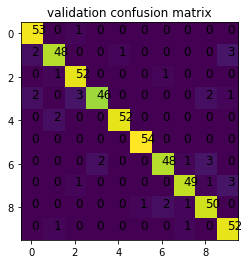

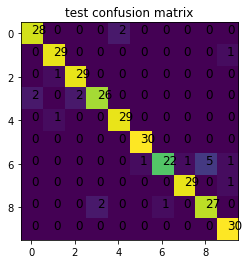

In [22]:
confmat_val = confusion_matrix(y_val, best_y_pred)
confmat_test = confusion_matrix(y_test, y_pred)

models = [confmat_val, confmat_test]
names = ['validation', 'test']

for i in range(2):
    plt.imshow(models[i], interpolation = 'nearest')
    
    for (j,k),l in np.ndenumerate(models[i]):
        plt. text(k, j, l, fontsize=12)
    plt.title('{} confusion matrix'.format(names[i]))
    plt.show()
        

### Βήμα 14
Εκπαιδεύστε ένα Αναδρομικό Νευρωνικό Δίκτυο πάνω στο training set, χρησιμοποιώντας το validation set για
τη ρύθμιση των υπερπαραμέτρων.

1. Χρησιμοποιήστε το βοηθητικό κώδικα ( lstm.py) για την υλοποίηση του δικτύου.

2. Αρχικά υλοποιήστε ένα απλό LSTM δίκτυο.

3. Εκπαιδεύστε το δίκτυο, τυπώνοντας μόνο το training loss σε κάθε εποχή.

4. Εκπαιδεύστε το δίκτυο, τυπώνοντας το training loss και σε κάθε εποχή κάντε αποτίμηση του μοντέλου
στο validation set και τυπώστε το validation loss.

5. Προσθέστε στο μοντέλο σας Dropout και L2 Regularization. Εξηγήστε τι κάνει το καθένα και σε τι
βοηθάνε κατά την εκπαίδευση.

6. Υλοποιήστε Early Stopping και Checkpoints (δηλαδή αποθήκευση του καλύτερου μοντέλου σε pickle).
Εξηγήστε γιατί είναι σωστό να χρησιμοποιούμε Early Stopping κατά την εκπαίδευση.

7. Εκπαιδεύστε ένα Bidirectional LSTM. Τι αλλάζει εσωτερικά στο δίκτυο και τι μας προσδίδει αυτή η
αλλαγή?

8. (Bonus) Χρησιμοποιήστε το pack_padded_sequence στην εκπαίδευση του μοντέλου. Θα χρειαστεί να
ταξινομήσετε τις ακολουθίες που δίνετε στη συνάρτηση αυτή του PyTorch κατά φθίνουσα σειρά μήκους
(μην ξεχάσετε να κρατήσετε και τα αντίστοιχα labels όταν γίνει η ταξινόμηση). Συγκρίνετε την
ταχύτητα εκπαίδευσης του δικτύου με πριν.

In [25]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset
import torch.nn as nn


class FrameLevelDataset(Dataset):

    def __init__(self, feats, labels):

        """
            feats: Python list of numpy arrays that contain the sequence features.
                   Each element of this list is a numpy array of shape seq_length x feature_dimension
            labels: Python list that contains the label for each sequence (each label must be an integer)
        """

        # Find the lengths 
        self.lengths = [x.shape[0] for x in feats]
        
        self.feats = self.zero_pad_and_stack(feats)
        if isinstance(labels, (list, tuple)):
            self.labels = np.array(labels).astype('int64')



    def zero_pad_and_stack(self, x):

        """
            This function performs zero padding on a list of features and forms them into a numpy 3D array
            returns
                padded: a 3D numpy array of shape [num_sequences x max_sequence_length x feature_dimension]
        """

        padded = []
        # --------------- Insert your code here ---------------- #
        feat = x[0].shape[1]
        pad = max(self.lengths)
        padded = np.array((len(x), pad, feat))
        
        for seqNum,k in enumerate(x):
            padded[seqNum, :len(k), :]=k
            
        return padded



    def __getitem__(self, item):
        return self.feats[item], self.labels[item], self.lengths[item]


    def __len__(self):
        return len(self.feats)





class BasicLSTM(nn.Module):

    def __init__(self, input_dim, rnn_size, output_dim, num_layers, bidirectional=False):

        super(BasicLSTM, self).__init__()
        self.input_dim = input_dim
        self.rnn_size = rnn_size
        self.output_dim = output_dim
        self.num_layers=num_layers
        self.bidirectional = bidirectional
        # --------------- Insert your code here ---------------- #

        # Initialize the LSTM, Dropout, Output layers

        self.lstm = nn.LSTM(input_dim, rnn_size, num_layers, dropout=drop_prob, batch_first=True, bidirectional=self.bidirectional)
        self.fc = nn.Linear(self.feature_size, out)
        

        self.feature_size = rnn_size * 2 if self.bidirectional else rnn_size

    


    def forward(self, x, lengths):
        """ 
                x:3D numpy array of dimension N x L x D
                N: batch index
                L: sequence index
                D: feature index
                lengths: N x 1
         """
       
        # --------------- Insert your code here ---------------- #

        # You must have all of the outputs of the LSTM, but you need only the last one (that does not exceed the sequence length)
        # To get it use the last_timestep method
        # Then pass it through the remaining network

        lstm_out, hidden = self.lstm(x)
        outputs = self.fc(lstm_out)
        last_outputs = self.last_timestep(outputs, lengths, self.biderectional)

        return last_outputs



    def last_timestep(self, outputs, lengths, bidirectional=False):

        """
            Returns the last output of the LSTM taking into account the zero padding
        """

        if bidirectional:

            forward, backward = self.split_directions(outputs)
            last_forward = self.last_by_index(forward, lengths)
            last_backward = backward[:, 0, :]

            # Concatenate and return - maybe add more functionalities like average

            return torch.cat((last_forward, last_backward), dim=-1)

        else:
            return self.last_by_index(outputs, lengths)


    @staticmethod
    def split_directions(outputs):
        direction_size = int(outputs.size(-1) / 2)
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]

        return forward, backward


    @staticmethod
    def last_by_index(outputs, lengths):
        # Index of the last output for each sequence.
        idx = (lengths - 1).view(-1, 1).expand(outputs.size(0),

                                               outputs.size(2)).unsqueeze(1)
        return outputs.gather(1, idx).squeeze()

In [28]:
import pickle

batch_size = 32
train_data = FrameLevelDataset(X_train, y_train.flatten().tolist())
train_loader = DataLoader(train_data,shuffle=True, batch_size = batch_size)

for inputs, labels,lengths in train_data:
    print("inputs: ", inputs, "labels: ", "lengths: ", lengths)

lengths = train_data.lengths 

val_data = FrameLevelDataset(X_val, y_val)
val_loader = DataLoader(val_data, shuffle=True, batch_size = batch_size)

for inputs, labels,lengths in val_loader:
    print("inputs: ", inputs, "labels: ", "lengths: ", lengths)
    

# Give the parameters for the LSTM 
output_dimension = 10
rnn_size = 32
num_layers = 3
input_dimension = 6
dropout = 0.4 #Dropout Is used to as a rularization layer to avoid overfitting may increase training time ! 

#Set the model 
model = BasicLSTM(input_dim = input_dimension, rnn_size = rnn_size, output_dim = output_dimension, num_layers = num_layers, drop_prob = dropout, bidirectional=True)


#Early Stopping Parameters
patience = 5
stop_counter = 0
early_stoping_flag = True  #Enable/disable Early Stopping

valid_loss_min = np.Inf

learning_rate = 0.002
criterion = nn.CrossEntropyLoss()
weight_decay=0.0001 #L2 Regularization parameter
optimizer = optim.Adam(model.parameters(), lerning_rate = learning_rate, weight_decay = weight_decay)

#GPU
model.cuda()
model.to(device)

#Initialize the first pickle
best_model_picle = pickle.dumps(model)

epochs = 40

mean_TrainLoss = []
mean_validation_losses = []

current_epoch_index = 0
training_epochs_errors = []
validation_epochs_errors = []

for i in range(epochs):
    model.train()
    current_epoch_index += 1
  
    train_pred = []
    train_labels = []
    epoch_training_loss = []
    current_batch_index = 0
  
    for inputs, labels, lengths in train_loader:
        current_batch_index += 1
        model.zero_grad()
        outputs = model(inputs.cuda().float(), lengths.cuda())

    #Compute Training (Epoch) Accuracy
        _, current_batch_predictions = torch.max(outputs.data,1) #Keep only max indeces
        train_pred = train_pred + current_batch_predictions.tolist()
        train_labels = train_labels + labels.tolist() #Keep track of all true labels in the same order that corresponds to predictions


        loss = criterion(outputs.cuda(), labels.cuda())

        epoch_training_loss.append(loss.item())

        loss.backward()
        optimizer.step()


        if(current_batch_index % 10 == 0): 
            print({ 'epoch': i, 'batch': current_batch_index, 'loss': loss.item() })

    model.eval()

    mean_TrainLoss.append(np.mean(np.array(epoch_training_loss)))

    current_epoch_accuracy = accuracy_score(train_labels, train_pred)

    current_epoch_error = 1 - current_epoch_accuracy
    training_epochs_errors.append(current_epoch_error)
    print("Train Data:")
    print("epoch: ",i, " accuracy: ", current_epoch_accuracy)
    print(" epoch: ",i, " mean loss: ", np.mean(np.array(epoch_training_loss)))

    total_validation_loss = []

    validation_pred = []
    validation_labels = []

    current_batch_index = 0
    epoch_validation_losses = []
    
    for inputs, labels, lengths in val_loader:
        current_batch_index += 1

    
        outputs = model(inputs.cuda().float(), lengths.cuda())

        #Validation (Epoch) Accuracy
        _, current_batch_predictions = torch.max(outputs.data,1) #Keep only max indeces
        validation_pred = validation_pred + current_batch_predictions.tolist()
        validation_labels = validation_labels + labels.tolist() #Keep track of all true labels in the same order that corresponds to predictions

        loss = criterion(outputs.cuda(), labels.cuda())
        total_validation_loss.append(loss)

        epoch_validation_losses.append(loss.item())

        if(current_batch_index % 10 == 0): print({ 'Evaluation stage: epoch': i, 'batch': current_batch_index, 'loss': loss.item() })

    mean_validation_losses.append(np.mean(np.array(epoch_validation_losses)))
    current_epoch_validation_accuracy = accuracy_score(validation_labels, validation_pred)
    current_epoch_validation_error = 1 - current_epoch_validation_accuracy
    validation_epochs_errors.append(current_epoch_validation_error)
    print("Validation Data:")
    print("Epoch: ",i, " accuracy: ", current_epoch_validation_accuracy)
    print("Epoch: ",i, " mean loss: ", np.mean(np.array(epoch_validation_losses)))

    if (sum(total_validation_loss)/len(total_validation_loss) <= valid_loss_min):
        valid_loss_min = sum(total_validation_loss)/len(total_validation_loss)
        stop_counter = 0
        # Save model in pickle
        best_model_pickle = pickle.dumps(model)


        print("Counte = 0, and valid_loss_min = ", valid_loss_min)

    else:
        stop_counter +=1
        print("Counter = ", stop_counter)

    if(early_stoping_flag and patience < stop_counter):
        print("Activating Early Stopping ")
        break

plt.figure()
plt.plot(range(current_epoch_index),mean_TrainLoss, label = "Train Loss")
plt.plot(range(current_epoch_index),mean_validation_losses, label = "Validation Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(range(current_epoch_index),training_epochs_errors, label = "Train Error")
plt.plot(range(current_epoch_index),validation_epochs_errors, label = "Validation Error")
plt.legend()
plt.show()

#Best Modelon Validation Set
validation_losses = []
validation_pred = []
validation_labels = []
best_model = pickle.loads(best_model_pickle) #Recovering best model
best_model.eval()

for inputs, labels, lengths in val_loader:
    
    outputs = best_model(inputs.cuda().float(), lengths.cuda())
    #Compute Validation (Epoch) Accuracy
    _, current_batch_predictions = torch.max(outputs.data,1) #Keep only max indeces
    validation_pred = validation_pred + current_batch_predictions.tolist()
    validation_labels = validation_labels + labels.tolist() #Keep track of all true labels in the same order that corresponds to predictions

    loss = criterion(outputs.cuda(), labels.cuda())
    validation_losses.append(loss)

print(" Best model validation mean loss: ", (sum(validation_losses)/len(validation_losses)).detach().cpu().numpy())
validation_accuracy = accuracy_score(validation_labels, validation_pred)
print("Validation accuracy: ", validation_accuracy)

#Metrics for Validation Set on the Best Model
test_data = FrameLevelDataset(X_test, y_test)
test_loader =  DataLoader(test_data, shuffle = True, batch_size = batch_size)

test_losses = []
test_predictions = []
test_labels = []
best_model = pickle.loads(best_model_pickle) #Recovering best model
best_model.eval()
for inputs, labels, lengths in test_loader:
    #model.zero_grad()
    outputs = best_model(inputs.cuda().float(), lengths.cuda())
    #Compute Validation (Epoch) Accuracy
    _, current_batch_predictions = torch.max(outputs.data,1) #Keep only max indeces
    test_predictions = test_predictions + current_batch_predictions.tolist()
    test_labels = test_labels + labels.tolist() #Keep track of all true labels in the same order that corresponds to predictions

    loss = criterion(outputs.cuda(), labels.cuda())
    test_losses.append(loss)

print("Best model test mean loss: ", (sum(test_losses)/len(test_losses)).detach().cpu().numpy())
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy: ", test_accuracy)

#Confusion Matrixes for Validation and Test Sets
cm_val=confusion_matrix(validation_labels, validation_pred)  #validation set conf.mat 

cm_test=confusion_matrix(test_labels, test_predictions)      #test conf.mat 

models = [cm_val , cm_test]
names = ['val', 'test']
for m in range(2):
    plt.imshow(models[m],interpolation = 'nearest',cmap = 'Greens')
    for (i, j), z in np.ndenumerate(models[m]):
        plt.text(j, i, z, ha='center', va='center')
        plt.title("Confusion Matrix for " + names[m] + " dataset")
        plt.xlabel(names[m])
        plt.ylabel("ground label")
        plt.show()